# Sistema de recomendaciones LicitaLAB
#### Basado en las descripciones de los usuarios y las categorías en que ofrecen.

Si es primera vez que se lanza este PyNotebook, se generarán un grupo de archivos, necesarios para llevar a cabo las recomendaciones. 

### Imports y configuraciones

In [1]:
import os
from utils.RecommenderSystem import RecommenderSystem  
import pandas as pd
from unidecode import unidecode  
import torch 
from sklearn.cluster import KMeans, AgglomerativeClustering 
import matplotlib.pyplot as plt

if torch.cuda.is_available():
    # Set the GPU device (assuming you have at least one GPU)
    gpu_device = 0  # You can change this to the index of the GPU you want to use
    torch.cuda.set_device(gpu_device)
    device = torch.device("cuda")
    print(f"Using GPU: {torch.cuda.get_device_name(gpu_device)}")
else:
    # If no GPU is available, use the CPU
    device = torch.device("cpu")
    print("No GPU available, using CPU")


Using GPU: NVIDIA GeForce RTX 3060


Agregar la ubicación donde se encuentra el .csv con el que se genera el espacio de usuarios.

In [2]:
train_path = 'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\marzo.csv'
test_path =  'C:\\Users\\magda\\OneDrive\\Escritorio\\MDS_licitalab\\abril.csv'

train = pd.read_csv(train_path) 
test = pd.read_csv(test_path)

Carga el Dataset.

In [3]:


train['feature_vector'] = train['agileoffereditemscategoriaofertada'] + ' ' + train['agileoffereditemsdescripcionofertada']
train['feature_vector'] = train['feature_vector'].apply(lambda x: unidecode(str(x)).lower())

test['feature_vector'] = test['agileoffereditemscategoriaofertada'] + ' ' + test['agileoffereditemsdescripcionofertada']
test['feature_vector'] = test['feature_vector'].apply(lambda x: unidecode(str(x)).lower())


<class 'pandas.core.frame.DataFrame'>


C:\Users\magda\AppData\Local\Temp\ipykernel_18752\3627091223.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)


,qualifying users
taxnumberprovider,
77.577.609-9,10
77.539.459-5,10
77.497.601-9,10
77.539.417-K,10
77.512.285-4,10
...,...
77.730.550-6,1610
91.575.000-1,1654
96.556.940-5,2114


,taxnumberprovider,qualifying users
0,77.577.609-9,10
1,77.539.459-5,10
2,77.497.601-9,10
3,77.539.417-K,10
4,77.512.285-4,10
...,...,...
1841,77.730.550-6,1610
1842,91.575.000-1,1654
1843,96.556.940-5,2114
1844,77.765.630-9,2558


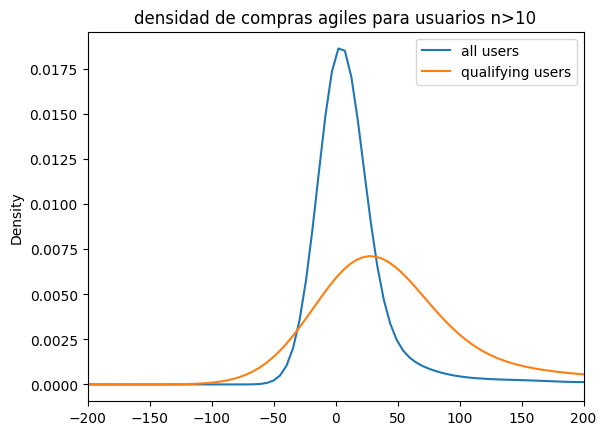

In [4]:
gb = train.groupby(by =['taxnumberprovider']).agg({'agilebuyingscode':'nunique'})
gb = gb.sort_values(by = 'agilebuyingscode')
gb.rename(columns={'agilebuyingscode': 'all users'}, inplace=True)

fig,ax = plt.subplots()
gb.plot.density(title = "densidad de compras agiles para todos los usuarios", ax = ax)
  
n_strings = 10
qualifying_users =  gb[gb['all users'] >= n_strings]
qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)

qualifying_users.plot.density(title = 'densidad de compras agiles para usuarios n>10',ax = ax, legend = True)
ax.set_xlim(-200, 200)

print(type(qualifying_users))
display(qualifying_users)
df = qualifying_users.reset_index()
display(df)

C:\Users\magda\AppData\Local\Temp\ipykernel_18752\4117253357.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)


(-200.0, 200.0)

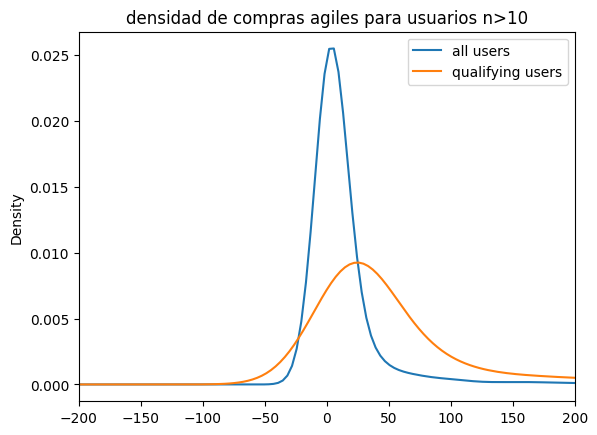

In [5]:
gb = test.groupby(by =['taxnumberprovider']).agg({'agilebuyingscode':'nunique'})
gb = gb.sort_values(by = 'agilebuyingscode')
gb.rename(columns={'agilebuyingscode': 'all users'}, inplace=True)

fig,ax = plt.subplots()
gb.plot.density(title = "densidad de compras agiles para todos los usuarios", ax = ax)
  
n_strings = 10
qualifying_users =  gb[gb['all users'] >= n_strings]
qualifying_users.rename(columns={'all users': 'qualifying users'}, inplace=True)

qualifying_users.plot.density(title = 'densidad de compras agiles para usuarios n>10',ax = ax, legend = True)
ax.set_xlim(-200, 200)

Lanzar el recomendador. Si no encuentra los archivos necesarios iniciará un proceso de generación de estos. Se demora bastante, pero no deberían haber problemas.

In [6]:
RS = RecommenderSystem(train,
                       test,
                       save_path = os.getcwd())

Initializing Recommender System
The current directory is c:\Users\magda\OneDrive\Escritorio\MDS_licitalab\Modeling\hito_4
Using GPU: NVIDIA GeForce RTX 3060


TypeError: UserSpace.__init__() got multiple values for argument 'save_path'

In [ ]:
RS.plot_clusters()

testing clusters in elbow method: 100%|██████████| 40/40 [00:15<00:00,  2.58user/s]


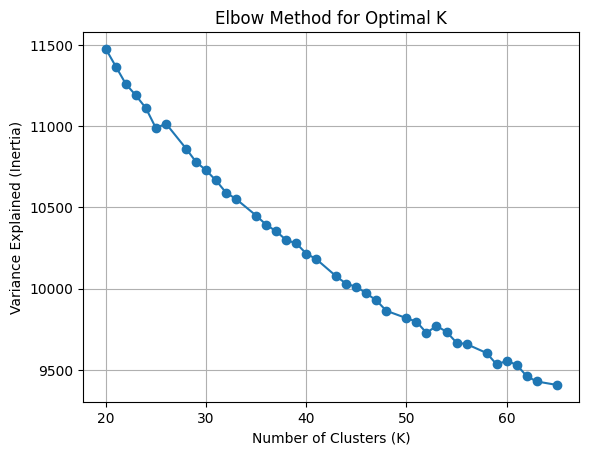

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Optimal n_clusters is 28
AgglomerativeClustering(n_clusters=28)
Used AgglomerativeClustering(n_clusters=28) to clusterize.

Silhouette Scores:
KMeans: 0.29261765
Agglomerative Clustering: 0.29261765


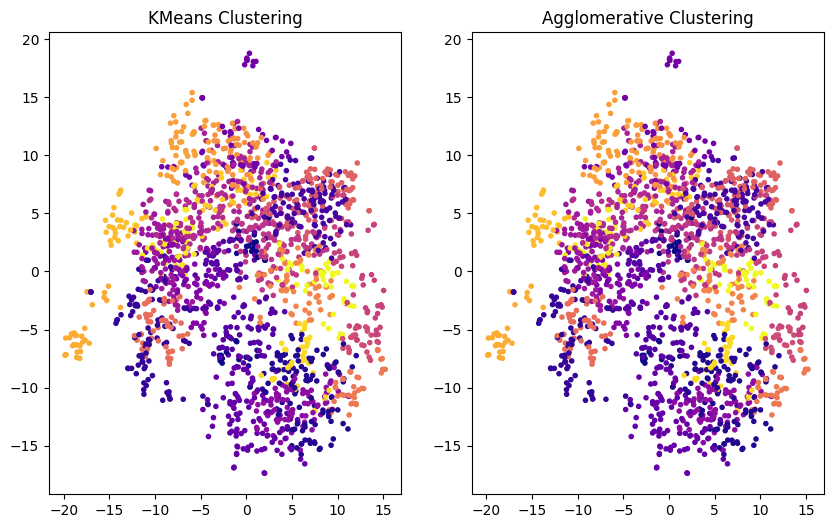

c:\Users\magda\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\collections.py:967: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


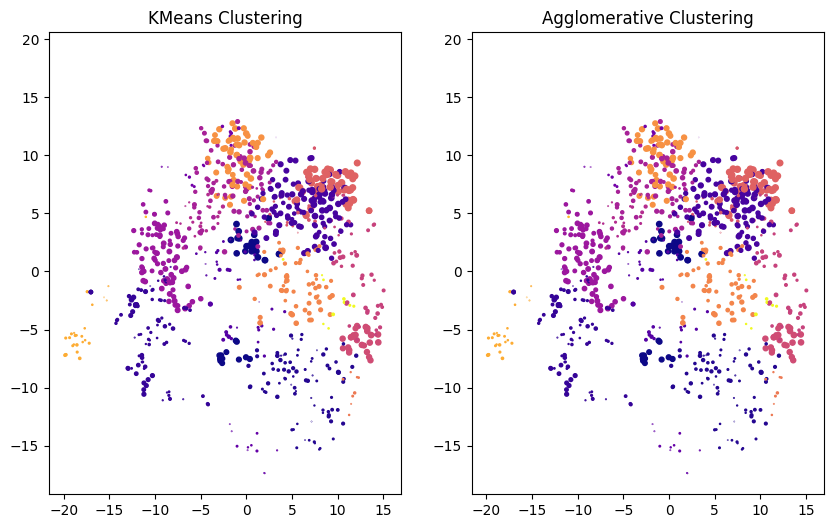

(1846,) (1846, 1) (1846,)
                                                      0
0     suministros de escritorio timbre fechero shiny...
1     escobas, traperos, cepillos y accesorios escob...
2     cafe y te vasos de plumavit desechables 240 cc...
3     accesorios o dispositivos para ingreso de dato...
4     muebles de oficina adquisicion de podiums acri...
...                                                 ...
1841  tecnologias de la informacion, telecomunicacio...
1842  soluciones y equipo de limpieza pre-esteriliza...
1843  equipos y suministros de limpieza / equipo de ...
1844  equipos y suministros de limpieza / equipo de ...
1845  equipamiento y suministros medicos / productos...

[1846 rows x 1 columns]
Exporting cluster model
Exporting clusters


In [ ]:
import numpy as np
RS.regenerate_clustering(AgglomerativeClustering(),
                         np.linspace(20,65,40,dtype = int))

### Predecir recomendaciones

Se le entrega el string del rut al sistema recomendador a traves de la función `predict()`. El sistema retorna el número de cluster al que el usuario ha sido asignado y un dataframe con las compras ágiles recomendadas. 

In [ ]:
ruts = test['taxnumberprovider'].sample(n =1) 
n_cluster,gg = RS.predict(ruts.values[0])

(76.739.523-K) data point belongs to cluster 4


### Métricas

In [ ]:
RS.evaluate_test()

Processing RUTs: 100%|██████████| 5545/5545 [20:04<00:00,  4.61it/s]


In [ ]:
display(RS.a)
display(RS.b)
display(RS.c)
display(RS.d)

,rut_proveedor,Cantidad_de_participaciones_reales_del_usuario,Cantidad_de_sugerencias_del_cluster,similitudes,cantidad_de_similitudes,Cluster,self_precision_%,self_recall_%,self_f1-score_%
0,76.341.054-4,118,21200,"{66242, 15490, 45337, 111390}",4,15,0.018868,3.389831,3.752696
1,77.231.189-3,220,22104,"{125025, 6435, 146061, 109519, 91024, 89713, 1...",10,11,0.045241,4.545455,8.958966
2,77.359.651-4,1179,15850,"{202118, 82568, 138001, 5777, 6165, 45974, 134...",30,14,0.189274,2.544529,35.234
3,77.275.972-K,839,21200,"{25344, 138629, 6021, 15113, 177422, 104719, 3...",34,15,0.160377,4.052443,30.854387
4,76.837.310-8,286,22104,"{90912, 135265, 77635, 15779, 19334, 199786, 1...",17,11,0.076909,5.944056,15.185348
...,...,...,...,...,...,...,...,...,...
5540,77.514.516-1,1,87884,{},0,8,0.0,0.0,0.0
5541,11.658.883-8,1,87884,{},0,8,0.0,0.0,0.0
5542,76.417.897-1,1,31856,{},0,1,0.0,0.0,0.0
5543,12.388.640-2,1,26192,{},0,7,0.0,0.0,0.0


,rut_proveedor,Cantidad_de_participaciones_reales_del_usuario,Cantidad_de_sugerencias_del_cluster,similitudes,cantidad_de_similitudes,Cluster,self_precision_%,self_recall_%,self_f1-score_%,Total_participaciones_cluster,peso_persona_en_el_cluster,self_precision_ponderada_%,self_recall_ponderada_%,self_f1-score_ponderada_%
0,76.341.054-4,118,21200,"{66242, 15490, 45337, 111390}",4,15,0.018868,3.389831,3.752696,11005,0.010722,0.000202,0.036347,0.040238
1,77.231.189-3,220,22104,"{125025, 6435, 146061, 109519, 91024, 89713, 1...",10,11,0.045241,4.545455,8.958966,7763,0.02834,0.001282,0.128816,0.253893
2,77.359.651-4,1179,15850,"{202118, 82568, 138001, 5777, 6165, 45974, 134...",30,14,0.189274,2.544529,35.234,9649,0.122189,0.023127,0.310913,4.305201
3,77.275.972-K,839,21200,"{25344, 138629, 6021, 15113, 177422, 104719, 3...",34,15,0.160377,4.052443,30.854387,11005,0.076238,0.012227,0.30895,2.352279
4,76.837.310-8,286,22104,"{90912, 135265, 77635, 15779, 19334, 199786, 1...",17,11,0.076909,5.944056,15.185348,7763,0.036841,0.002833,0.218988,0.55945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,77.514.516-1,1,87884,{},0,8,0.0,0.0,0.0,29477,0.000034,0.0,0.0,0.0
5541,11.658.883-8,1,87884,{},0,8,0.0,0.0,0.0,29477,0.000034,0.0,0.0,0.0
5542,76.417.897-1,1,31856,{},0,1,0.0,0.0,0.0,20884,0.000048,0.0,0.0,0.0
5543,12.388.640-2,1,26192,{},0,7,0.0,0.0,0.0,11525,0.000087,0.0,0.0,0.0


,Cluster,self_precision_%,self_recall_%,self_f1-score_%,Licitaciones_calzadas,Total_participaciones_de_cada_rut_en_cluster,Cantidad_de_sugerencias_para_el_cluster,Cantidad_de_provedores_en_cluster,Peso_cluster,self_precision_ponderada_%,self_recall_ponderada_%,self_f1-score_ponderada_%
0,0,0.09474,2.830189,17.604868,117,4134,15628,136,0.024527,0.002324,0.069415,0.431788
1,1,0.23618,6.631871,42.735725,1385,20884,31856,1071,0.193147,0.045617,1.280926,8.254276
2,2,0.171257,6.614901,32.168826,1346,20348,34912,353,0.063661,0.010902,0.421111,2.047898
3,3,0.061676,4.241752,12.060962,306,7214,20413,184,0.033183,0.002047,0.140754,0.400219
4,4,0.090118,11.057815,17.769884,2605,23558,52999,346,0.062399,0.005623,0.689992,1.108815
5,5,0.030618,2.691448,5.936309,265,9846,14396,477,0.086023,0.002634,0.231528,0.510662
6,6,0.082904,1.889814,14.93957,59,3122,9273,129,0.023264,0.001929,0.043965,0.347557
7,7,0.024027,5.266811,4.765617,607,11525,26192,595,0.107304,0.002578,0.565149,0.511369
8,8,0.262283,17.345727,50.574465,5113,29477,87884,686,0.123715,0.032448,2.145928,6.256823
9,9,0.107693,6.666667,21.026769,1132,16980,32701,207,0.037331,0.00402,0.248873,0.784949


{'self_precision_porcentual_global': 0.13345386749133198,
 'self_recall_porcentual_global': 6.873232610893231,
 'self_f1_score_porcentual_global': 25.081652093169104,
 'total_participaciones_todos': 217003,
 'total_licitaciones_calzadas': 16060,
 'ratio_par_calz': 0.0740081934351138}